In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
#load the data
data=pd.read_csv("/Users/shufengli/Desktop/501/covid-19_vaccine_tweets_with_sentiment.csv",encoding='latin-1')
data=data.head(1000)
y=data["label"]
data

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."
...,...,...,...
995,1.384944e+18,2,hate news ... our #rss and youth are using #co...
996,1.367079e+18,3,#COVAXIN has demonstrated an interim vaccine e...
997,1.338923e+18,2,Despite #Lebanons dire shortage of foreign ex...
998,1.383063e+18,3,@JustinTrudeau Moscow Russia everything is ope...


In [3]:
#count the frequency of words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["tweet_text"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# #divide the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [5]:
# build and fit the model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [6]:
#calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values,y_predict)

0.62

In [7]:
#calculate the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cf=metrics.confusion_matrix(y_test.values, y_predict)
cf

array([[ 0,  7,  1],
       [ 1, 92, 39],
       [ 0, 28, 32]])

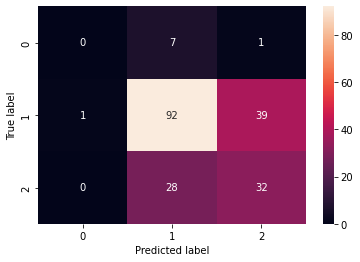

In [8]:
#plot the confusion matrix
sns.heatmap(cf,annot=True,fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


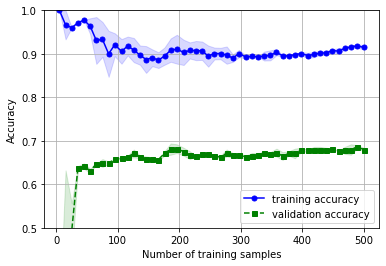

In [9]:
#plot the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=2, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()


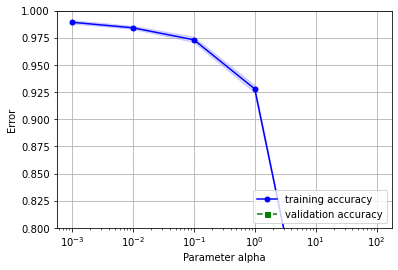

In [10]:
#plot the error curve
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=clf, X=X, y=y, param_name='alpha', param_range=param_range, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Error')
plt.ylim([0.8, 1.0])
plt.show()


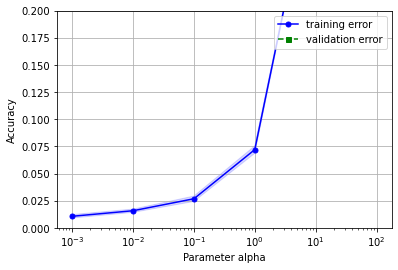

In [11]:
#plot the cross validation curve
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=clf, X=X, y=y, param_name='alpha', param_range=param_range, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, 1-train_mean, color='blue', marker='o', markersize=5, label='training error')
plt.fill_between(param_range, 1-train_mean + train_std, 1-train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, 1-test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation error')
plt.fill_between(param_range, 1-test_mean + test_std, 1-test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.2])
plt.show()
